In [1]:
import numpy as np
import rebound
import reboundx
from matplotlib import pyplot as plt

In [6]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-3, a=1.5, e=0.98, r=1.6*4.67e-4, M=0)
sim.move_to_com()

rebx = reboundx.Extras(sim)
td = rebx.load_force("tides_dynamical")
rebx.add_force(td)

sim.particles[1].params["td_dP_crit"] = 0
sim.particles[1].params["td_c_real"] = 0
sim.particles[1].params["td_c_imag"] = 0
sim.particles[1].params["td_drag_exp"] = 10

N = 10000
t = np.linspace(0, 1e4, N)
e = np.zeros(t.shape)
a = np.zeros(t.shape)
M = np.zeros(t.shape)
EB0 = sim.particles[1].m / (2*1.5)
E_mode = np.zeros(t.shape)

c_real = np.zeros(t.shape)
c_imag = np.zeros(t.shape)
M_last = 0

E_peri = []

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    e[i] = o.e
    a[i] = o.a
    M[i] = o.M
    E_mode[i] = EB0 * (sim.particles[1].params["td_c_real"]**2 + sim.particles[1].params["td_c_imag"]**2)
    c_real[i] = sim.particles[1].params["td_c_real"]
    c_imag[i] = sim.particles[1].params["td_c_imag"]
    if i % 5 == 0 and i != 0:
        E_tilde_mode = sim.particles[1].params["td_c_real"]**2 + sim.particles[1].params["td_c_imag"]**2
        print(t[i], e[i], a[i], sim.particles[1].params["td_drag_coef"], sim.particles[1].params["td_dP_hat"], o.M, E_tilde_mode)

    if o.M >= 2 and M_last <= 2:
        E_peri.append(E_mode[i] + sim.energy())
    sim.integrate(time * 2 * np.pi)
    M_last = o.M

5.000500050005 0.9799938180660249 1.499536216653447 -3.7001016091361764e-23 39.39334888081134 1.1263144837219743 0.00030651839794429187
10.00100010001 0.9799771213175699 1.498285018264574 -3.878414034970261e-22 59.621709375906235 5.685089845973275 0.0005717704612768311
15.001500150015 0.9799988091598794 1.4999106380566287 3.6661321573576607e-22 23.781861336082418 3.9596212904693213 0.000590856804286175
20.00200020002 0.9799969983541438 1.4997747736069944 -1.8902954455158863e-22 41.58574743817479 2.2313349881221924 0.0001488268011397897
25.002500250025 0.9799749693631975 1.4981239097996542 2.665292880861697e-22 53.51371322735056 0.5040644531351193 0.0012410748514583574
30.00300030003 0.9799787799505905 1.4984092173099084 1.0752330352984916e-21 57.91557150295862 5.070044369863734 0.0026118851448113
35.003500350035 0.9799506355221527 1.4963045362431198 -1.045584691969747e-21 81.16548155228931 3.380465760705968 0.0009308261470688008
40.00400040004 0.9799260673762143 1.4944721191597565 1.14

(100.0, 210.0)

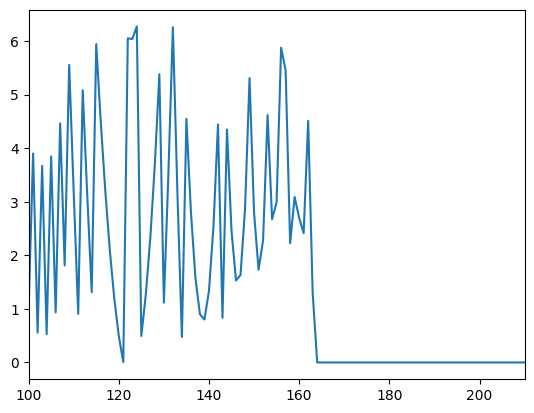

In [3]:
plt.plot(M)
plt.xlim([100, 210])

In [5]:
#sim.particles[1].params['td_debug_Eb_last']
sim.energy()

-0.0003727250741357554

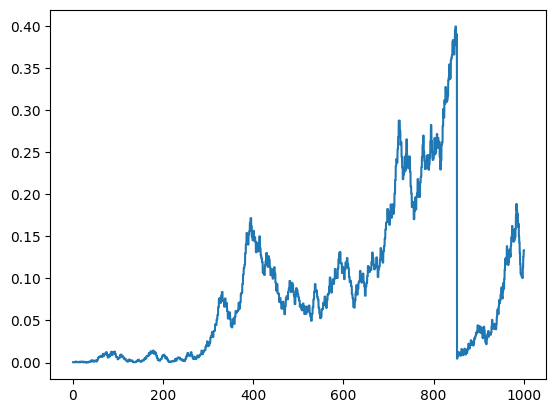

In [3]:
plt.plot(t[E_mode != 0], (E_mode / EB0)[E_mode != 0])

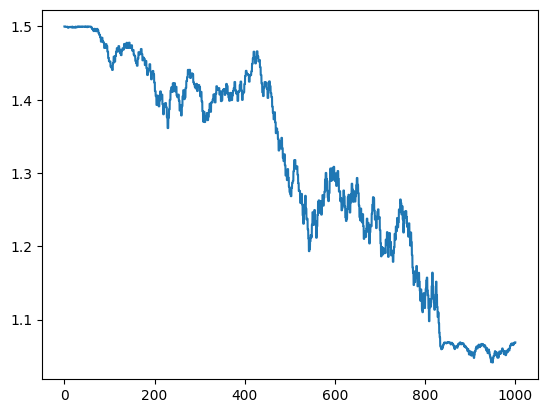

In [3]:
plt.plot(t,a)

/tmp/ipykernel_1390/2094712904.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(c_real, c_imag, s=5, c=np.log10(np.linspace(0, 10, c_real.shape[0])))


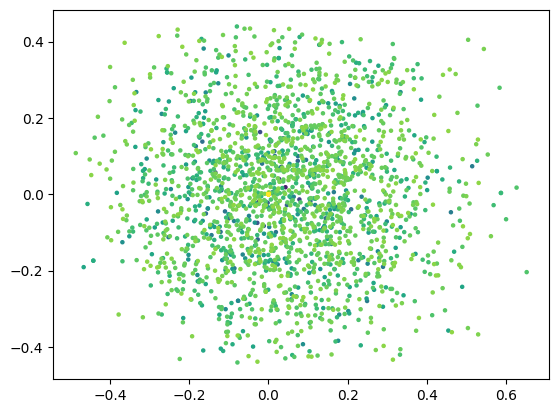

In [7]:
plt.scatter(c_real, c_imag, s=5, c=np.log10(np.linspace(0, 10, c_real.shape[0])))

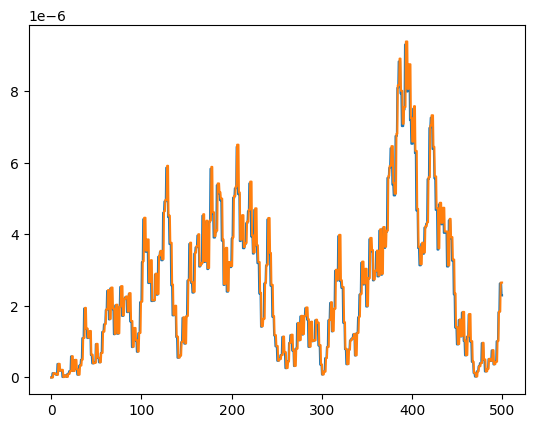

In [5]:
EB0 = sim.particles[1].m / (2*a[0])
#plt.plot(np.diff((-sim.particles[1].m / (2*a[t<=1e3])) / EB0))
#plt.plot((0, 60), (-0.01, -0.01))
#plt.plot(t, a)
#plt.plot(t, a*(1-e**2))

#plt.plot(t[t<=13], E_mode[t<=1e3])
plt.plot(t[:1000], E_mode[:1000])
plt.plot(t[:1000], -(EB0-(sim.particles[1].m / (2*a[:1000]))))
#plt.plot(E_mode[1:] + EB0 + (-(sim.particles[1].m / (2*a[:-1]))))
#plt.plot(E_peri)